# WeatherPy

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [28]:
#location/date data frames
city_name = []
country = []
date = [] 

#informational data frames
temp = []
humid = []
cloudy = []
wind = []
lat = []
long = []

#setting parameters
record = 1
set_num = 1

print(f"Data Start")
print(f"-------------------------")

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloudy.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        cityloop = response["name"]
      
        print(f"Processing Record {record} of Set {set_num} | {cityloop}")
      
        record= record + 1
        if record == 51:
            record=1
            set_num = set_num + 1
    except:
        print("City not found.")
    continue
print('---------------------')
print('Data Received')
print('---------------------')

Data Start
-------------------------
Processing Record 1 of Set 1 | Vaini
Processing Record 2 of Set 1 | Ilulissat
Processing Record 3 of Set 1 | Kruisfontein
Processing Record 4 of Set 1 | Kapaa
Processing Record 5 of Set 1 | Lorengau
Processing Record 6 of Set 1 | Platanos
Processing Record 7 of Set 1 | Narsaq
Processing Record 8 of Set 1 | Planaltina
Processing Record 9 of Set 1 | Balkanabat
Processing Record 10 of Set 1 | Ambon
City not found.
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Hami
Processing Record 13 of Set 1 | San Patricio
Processing Record 14 of Set 1 | Shashi
Processing Record 15 of Set 1 | Mataura
City not found.
Processing Record 16 of Set 1 | Sao Gabriel da Cachoeira
Processing Record 17 of Set 1 | Jamestown
Processing Record 18 of Set 1 | Khatanga
Processing Record 19 of Set 1 | Pokhara
Processing Record 20 of Set 1 | Beringovskiy
Processing Record 21 of Set 1 | Ribeira Grande
Processing Record 22 of Set 1 | Torbay
Processing Record 23

Processing Record 41 of Set 4 | Thaba-Tseka
Processing Record 42 of Set 4 | San Rafael
Processing Record 43 of Set 4 | Aksarka
Processing Record 44 of Set 4 | Sitka
City not found.
Processing Record 45 of Set 4 | Mayo
Processing Record 46 of Set 4 | Iznoski
Processing Record 47 of Set 4 | Hauterive
Processing Record 48 of Set 4 | Bagepalli
Processing Record 49 of Set 4 | Normandin
Processing Record 50 of Set 4 | Arraial do Cabo
Processing Record 1 of Set 5 | Blagoyevo
Processing Record 2 of Set 5 | Nerchinskiy Zavod
City not found.
Processing Record 3 of Set 5 | Dunedin
Processing Record 4 of Set 5 | Prachuap Khiri Khan
Processing Record 5 of Set 5 | Bonthe
City not found.
Processing Record 6 of Set 5 | Aklavik
Processing Record 7 of Set 5 | Thompson
Processing Record 8 of Set 5 | Dudinka
Processing Record 9 of Set 5 | Miandrivazo
Processing Record 10 of Set 5 | Honiara
Processing Record 11 of Set 5 | Zwedru
Processing Record 12 of Set 5 | Hamilton
Processing Record 13 of Set 5 | Batag

Processing Record 30 of Set 8 | Okhotsk
Processing Record 31 of Set 8 | Inhambane
Processing Record 32 of Set 8 | Kudahuvadhoo
Processing Record 33 of Set 8 | Lodi
Processing Record 34 of Set 8 | Quchan
Processing Record 35 of Set 8 | Pio XII
Processing Record 36 of Set 8 | Zhaoqing
Processing Record 37 of Set 8 | Millinocket
Processing Record 38 of Set 8 | Georgiyevka
Processing Record 39 of Set 8 | Zalari
Processing Record 40 of Set 8 | Saint-Francois
Processing Record 41 of Set 8 | Natchitoches
Processing Record 42 of Set 8 | Soderhamn
Processing Record 43 of Set 8 | Carndonagh
Processing Record 44 of Set 8 | Tiksi
Processing Record 45 of Set 8 | Tautira
Processing Record 46 of Set 8 | Chunskiy
Processing Record 47 of Set 8 | Tuensang
Processing Record 48 of Set 8 | Port Blair
Processing Record 49 of Set 8 | Mount Gambier
City not found.
Processing Record 50 of Set 8 | Keroka
Processing Record 1 of Set 9 | Shahe
Processing Record 2 of Set 9 | Dobson
Processing Record 3 of Set 9 | Sh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_data = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloudy,
    "Wind Speed": wind,
    "Lat": lat,
    "Lng": long}   

final_weather_data = pd.DataFrame(weather_data)

final_weather_data.to_csv ('output_data/city_data.csv', index = None, header=True)
final_weather_data.count()

City          525
Country       525
Date          525
Max Temp      525
Humidity      525
Cloudiness    525
Wind Speed    525
Lat           525
Lng           525
dtype: int64

In [30]:
final_weather_data.head()

,City,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed,Lat,Lng
0,Vaini,IN,1571631305,73.40,94,75,2.24,15.34,74.49
1,Ilulissat,GL,1571631305,19.40,62,89,2.24,69.22,-51.10
2,Kruisfontein,ZA,1571631306,55.29,92,97,10.65,-34.00,24.73
3,Kapaa,US,1571631306,82.40,78,90,8.05,22.08,-159.32
4,Lorengau,PG,1571631306,82.52,81,94,10.65,-2.02,147.27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

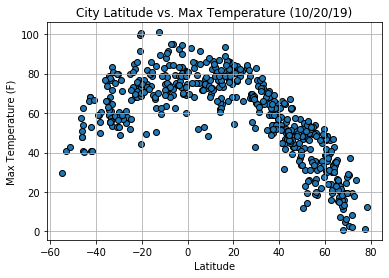

In [31]:
plt.scatter(final_weather_data["Lat"], final_weather_data["Max Temp"], marker="o", edgecolors="black")

plt.title(f"City Latitude vs. Max Temperature (10/20/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/temp.png")

plt.show()

#### Latitude vs. Humidity Plot

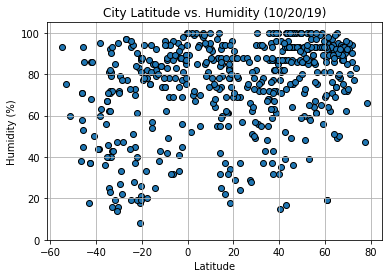

In [32]:
plt.scatter(final_weather_data["Lat"], final_weather_data["Humidity"], marker="o", edgecolors="black")

plt.title(f"City Latitude vs. Humidity (10/20/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(0, 105)

plt.savefig("output_data/humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

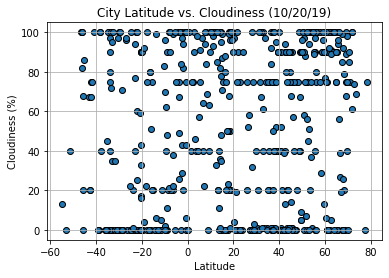

In [33]:
plt.scatter(final_weather_data["Lat"], final_weather_data["Cloudiness"], marker="o", edgecolors="black")

plt.title(f"City Latitude vs. Cloudiness (10/20/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/cloudy.png")

plt.show()

#### Latitude vs. Wind Speed Plot

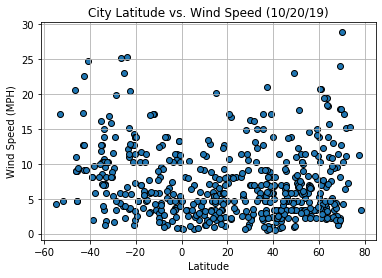

In [34]:
plt.scatter(final_weather_data["Lat"], final_weather_data["Wind Speed"], marker="o", edgecolors="black")

plt.title(f"City Latitude vs. Wind Speed (10/20/19)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/windspeed.png")

plt.show()

# Analysis
1) The information provided in the Max Temp and Latitude chart shows that temperatures are higher when near the equator. This has been established for years, but what's interesting is the variation of northern and southern hemispheres. The southern hemisphere seems to be having middle temperatrues during October while the northern hemisphere is slowly moving to colder and colder temperatures because of the change in seasons. 

2) Latitude and Wind Speed do not seem to have a signficant correlation. The chart seems to show that both cities in the northern and southern hemisphere expience similar wind speeds. Some cities range from 20 to 25 mph, but the majority across the globe seems to land between 15 and 0 mph due to the concentration of dots on the chart. 

3) At this point of the year, it seems that regardless of location, most cities are extremely humid (at least 75% humidity). A majority of the chart showcases a very top heavy scatter plot of humidity above, 75% while only a handful (probably around 25 to 30% are below 75% humidity. 